In [1]:
# IMPORTANTE
# TODO: na validacao se acontecer uma presenca no meio eu tenho que contar como erro meu

# TODO: adicionar a validacao la de baixo
# TODO: tentar uma unica variaval para ruptura
# TODO: Gerar os indicadores para o mario poder validar.

# ranqueamento das lojas
# se tiver presenca e eu marquei pontos la em cima, poderia contar como erro.

# Historico
- Rede dupla e/ou com 100 neuronios: ruim. Nos primeiros passos o resultado fica razoavel, mas quando avanca piora.
- Rede unica com 10 neuronios: bom.

In [1]:
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
import sys 
import json
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph 
import math
import collections
import pandas as pd

## for Deep-learing:
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Lambda
from keras.models import model_from_json
from tensorflow.python.keras.callbacks import TensorBoard

from itertools import product
from functools import partial
from time import time

from core.DataExploration import DataExploration
from ruptura.CreateBatch import CreateBatch
from ruptura.RupturaPrediction import RupturaPrediction
from ruptura.RupturaNeuralNetwork import RupturaNeuralNetwork

Using TensorFlow backend.


# CARREGAMENTO DOS DADOS

In [2]:
createBatch = CreateBatch()
X, Y, Ytest = createBatch.batch('biscoitos-barbieri-8-3-19.json')

WARNING - need error handling on samples


# MODEL DEFINITION

In [3]:
#DEFINE THE MODEL
batch_size = 64
time_steps = X.shape[1]
x_dimension = X.shape[2]
rupNN = RupturaNeuralNetwork()
newModel = True

if newModel:
    n_neurons = 12
    model = Sequential()
    model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    #model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    #model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    model.compile(
        loss=rupNN.getCustomLoss((batch_size,time_steps)),
        #loss = 'categorical_crossentropy', 
        optimizer='adam')
    print('MODEL CREATED\n')
    print(model.summary())
else:
    model = rupNN.loadModel((batch_size,time_steps))  # Y dimensions are needed for custom loss definitions
    print('MODEL LOADED\n')
    print(model.summary())

MODEL CREATED

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 12)            816       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 4)             52        
Total params: 868
Trainable params: 868
Non-trainable params: 0
_________________________________________________________________
None


# TRAINING

In [4]:
cut1 = batch_size
cut2 = X.shape[0] - X.shape[0]%batch_size
Xval, Xtrain,_ = np.split(X,[cut1,cut2])
Yval, Ytrain,_ = np.split(Y,[cut1,cut2])

for step in range(30):
    n_epoch = 100
    model.fit(Xtrain, Ytrain, 
                  epochs=n_epoch, 
                  batch_size= batch_size, 
                  validation_data=(Xval, Yval),
                  verbose=2)
    rupNN.saveModel(model)

Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 7s - loss: 0.3345 - val_loss: 0.4452
Epoch 2/100
 - 5s - loss: 0.3189 - val_loss: 0.4409
Epoch 3/100
 - 5s - loss: 0.3094 - val_loss: 0.4286
Epoch 4/100
 - 5s - loss: 0.3037 - val_loss: 0.4155
Epoch 5/100
 - 5s - loss: 0.2983 - val_loss: 0.3999
Epoch 6/100
 - 5s - loss: 0.2915 - val_loss: 0.3821
Epoch 7/100
 - 5s - loss: 0.2831 - val_loss: 0.3617
Epoch 8/100
 - 5s - loss: 0.2773 - val_loss: 0.3542
Epoch 9/100
 - 5s - loss: 0.2739 - val_loss: 0.3478
Epoch 10/100
 - 5s - loss: 0.2711 - val_loss: 0.3449
Epoch 11/100
 - 5s - loss: 0.2689 - val_loss: 0.3426
Epoch 12/100
 - 5s - loss: 0.2672 - val_loss: 0.3396
Epoch 13/100
 - 5s - loss: 0.2655 - val_loss: 0.3390
Epoch 14/100
 - 5s - loss: 0.2638 - val_loss: 0.3386
Epoch 15/100
 - 5s - loss: 0.2624 - val_loss: 0.3360
Epoch 16/100
 - 5s - loss: 0.2608 - val_loss: 0.3361
Epoch 17/100
 - 5s - loss: 0.2596 - val_loss: 0.3356
Epoch 18/100
 - 5s - loss: 0.2586 - val_loss: 0.3344
Epoch 19/

 - 5s - loss: 0.2320 - val_loss: 0.3065
Epoch 55/100
 - 5s - loss: 0.2319 - val_loss: 0.3063
Epoch 56/100
 - 5s - loss: 0.2321 - val_loss: 0.3061
Epoch 57/100
 - 5s - loss: 0.2321 - val_loss: 0.3063
Epoch 58/100
 - 5s - loss: 0.2324 - val_loss: 0.3073
Epoch 59/100
 - 5s - loss: 0.2322 - val_loss: 0.3063
Epoch 60/100
 - 5s - loss: 0.2320 - val_loss: 0.3073
Epoch 61/100
 - 5s - loss: 0.2321 - val_loss: 0.3061
Epoch 62/100
 - 5s - loss: 0.2318 - val_loss: 0.3059
Epoch 63/100
 - 5s - loss: 0.2317 - val_loss: 0.3055
Epoch 64/100
 - 5s - loss: 0.2316 - val_loss: 0.3062
Epoch 65/100
 - 5s - loss: 0.2313 - val_loss: 0.3061
Epoch 66/100
 - 5s - loss: 0.2313 - val_loss: 0.3054
Epoch 67/100
 - 5s - loss: 0.2317 - val_loss: 0.3059
Epoch 68/100
 - 5s - loss: 0.2316 - val_loss: 0.3062
Epoch 69/100
 - 5s - loss: 0.2311 - val_loss: 0.3061
Epoch 70/100
 - 5s - loss: 0.2313 - val_loss: 0.3061
Epoch 71/100
 - 5s - loss: 0.2312 - val_loss: 0.3059
Epoch 72/100
 - 5s - loss: 0.2314 - val_loss: 0.3060
Epoch 

Epoch 8/100
 - 5s - loss: 0.2239 - val_loss: 0.2969
Epoch 9/100
 - 5s - loss: 0.2234 - val_loss: 0.2967
Epoch 10/100
 - 5s - loss: 0.2237 - val_loss: 0.2963
Epoch 11/100
 - 5s - loss: 0.2234 - val_loss: 0.2970
Epoch 12/100
 - 5s - loss: 0.2233 - val_loss: 0.2962
Epoch 13/100
 - 5s - loss: 0.2236 - val_loss: 0.2970
Epoch 14/100
 - 5s - loss: 0.2239 - val_loss: 0.2966
Epoch 15/100
 - 5s - loss: 0.2232 - val_loss: 0.2948
Epoch 16/100
 - 5s - loss: 0.2231 - val_loss: 0.2961
Epoch 17/100
 - 5s - loss: 0.2234 - val_loss: 0.2972
Epoch 18/100
 - 5s - loss: 0.2231 - val_loss: 0.2946
Epoch 19/100
 - 5s - loss: 0.2227 - val_loss: 0.2954
Epoch 20/100
 - 6s - loss: 0.2228 - val_loss: 0.2960
Epoch 21/100
 - 8s - loss: 0.2227 - val_loss: 0.2959
Epoch 22/100
 - 7s - loss: 0.2228 - val_loss: 0.2952
Epoch 23/100
 - 7s - loss: 0.2227 - val_loss: 0.2961
Epoch 24/100
 - 7s - loss: 0.2232 - val_loss: 0.2953
Epoch 25/100
 - 7s - loss: 0.2226 - val_loss: 0.2957
Epoch 26/100
 - 7s - loss: 0.2227 - val_loss: 0.

Epoch 62/100
 - 6s - loss: 0.2156 - val_loss: 0.2863
Epoch 63/100
 - 6s - loss: 0.2152 - val_loss: 0.2854
Epoch 64/100
 - 6s - loss: 0.2151 - val_loss: 0.2853
Epoch 65/100
 - 6s - loss: 0.2149 - val_loss: 0.2864
Epoch 66/100
 - 6s - loss: 0.2156 - val_loss: 0.2855
Epoch 67/100
 - 6s - loss: 0.2151 - val_loss: 0.2849
Epoch 68/100
 - 6s - loss: 0.2148 - val_loss: 0.2855
Epoch 69/100
 - 6s - loss: 0.2150 - val_loss: 0.2854
Epoch 70/100
 - 6s - loss: 0.2148 - val_loss: 0.2854
Epoch 71/100
 - 6s - loss: 0.2148 - val_loss: 0.2875
Epoch 72/100
 - 6s - loss: 0.2148 - val_loss: 0.2850
Epoch 73/100
 - 6s - loss: 0.2146 - val_loss: 0.2838
Epoch 74/100
 - 6s - loss: 0.2148 - val_loss: 0.2846
Epoch 75/100
 - 6s - loss: 0.2144 - val_loss: 0.2840
Epoch 76/100
 - 6s - loss: 0.2143 - val_loss: 0.2865
Epoch 77/100
 - 6s - loss: 0.2185 - val_loss: 0.2901
Epoch 78/100
 - 6s - loss: 0.2261 - val_loss: 0.2884
Epoch 79/100
 - 6s - loss: 0.2202 - val_loss: 0.2870
Epoch 80/100
 - 6s - loss: 0.2149 - val_loss: 

 - 6s - loss: 0.2090 - val_loss: 0.2810
Epoch 16/100
 - 6s - loss: 0.2089 - val_loss: 0.2784
Epoch 17/100
 - 6s - loss: 0.2089 - val_loss: 0.2780
Epoch 18/100
 - 6s - loss: 0.2090 - val_loss: 0.2791
Epoch 19/100
 - 6s - loss: 0.2090 - val_loss: 0.2790
Epoch 20/100
 - 6s - loss: 0.2088 - val_loss: 0.2783
Epoch 21/100
 - 6s - loss: 0.2087 - val_loss: 0.2777
Epoch 22/100
 - 6s - loss: 0.2090 - val_loss: 0.2772
Epoch 23/100
 - 6s - loss: 0.2126 - val_loss: 0.2818
Epoch 24/100
 - 6s - loss: 0.2099 - val_loss: 0.2781
Epoch 25/100
 - 6s - loss: 0.2088 - val_loss: 0.2790
Epoch 26/100
 - 6s - loss: 0.2093 - val_loss: 0.2797
Epoch 27/100
 - 6s - loss: 0.2088 - val_loss: 0.2768
Epoch 28/100
 - 6s - loss: 0.2086 - val_loss: 0.2771
Epoch 29/100
 - 6s - loss: 0.2087 - val_loss: 0.2791
Epoch 30/100
 - 6s - loss: 0.2086 - val_loss: 0.2783
Epoch 31/100
 - 6s - loss: 0.2086 - val_loss: 0.2794
Epoch 32/100
 - 6s - loss: 0.2086 - val_loss: 0.2776
Epoch 33/100
 - 6s - loss: 0.2085 - val_loss: 0.2789
Epoch 

 - 5s - loss: 0.2048 - val_loss: 0.2751
Epoch 70/100
 - 5s - loss: 0.2052 - val_loss: 0.2750
Epoch 71/100
 - 5s - loss: 0.2050 - val_loss: 0.2754
Epoch 72/100
 - 5s - loss: 0.2047 - val_loss: 0.2744
Epoch 73/100
 - 5s - loss: 0.2047 - val_loss: 0.2748
Epoch 74/100
 - 5s - loss: 0.2067 - val_loss: 0.2758
Epoch 75/100
 - 5s - loss: 0.2054 - val_loss: 0.2759
Epoch 76/100
 - 5s - loss: 0.2050 - val_loss: 0.2763
Epoch 77/100
 - 5s - loss: 0.2050 - val_loss: 0.2742
Epoch 78/100
 - 5s - loss: 0.2084 - val_loss: 0.2767
Epoch 79/100
 - 5s - loss: 0.2064 - val_loss: 0.2770
Epoch 80/100
 - 5s - loss: 0.2051 - val_loss: 0.2757
Epoch 81/100
 - 5s - loss: 0.2050 - val_loss: 0.2740
Epoch 82/100
 - 5s - loss: 0.2045 - val_loss: 0.2746
Epoch 83/100
 - 5s - loss: 0.2046 - val_loss: 0.2741
Epoch 84/100
 - 5s - loss: 0.2047 - val_loss: 0.2759
Epoch 85/100
 - 5s - loss: 0.2063 - val_loss: 0.2781
Epoch 86/100
 - 5s - loss: 0.2053 - val_loss: 0.2750
Epoch 87/100
 - 5s - loss: 0.2046 - val_loss: 0.2741
Epoch 

Epoch 23/100
 - 5s - loss: 0.2136 - val_loss: 0.2736
Epoch 24/100
 - 5s - loss: 0.2137 - val_loss: 0.2741
Epoch 25/100
 - 5s - loss: 0.2135 - val_loss: 0.2734
Epoch 26/100
 - 5s - loss: 0.2132 - val_loss: 0.2735
Epoch 27/100
 - 5s - loss: 0.2132 - val_loss: 0.2757
Epoch 28/100
 - 5s - loss: 0.2134 - val_loss: 0.2731
Epoch 29/100
 - 5s - loss: 0.2129 - val_loss: 0.2732
Epoch 30/100
 - 5s - loss: 0.2128 - val_loss: 0.2725
Epoch 31/100
 - 5s - loss: 0.2126 - val_loss: 0.2731
Epoch 32/100
 - 5s - loss: 0.2129 - val_loss: 0.2724
Epoch 33/100
 - 5s - loss: 0.2127 - val_loss: 0.2723
Epoch 34/100
 - 5s - loss: 0.2127 - val_loss: 0.2726
Epoch 35/100
 - 5s - loss: 0.2126 - val_loss: 0.2728
Epoch 36/100
 - 5s - loss: 0.2126 - val_loss: 0.2729
Epoch 37/100
 - 5s - loss: 0.2129 - val_loss: 0.2743
Epoch 38/100
 - 5s - loss: 0.2123 - val_loss: 0.2724
Epoch 39/100
 - 5s - loss: 0.2125 - val_loss: 0.2731
Epoch 40/100
 - 5s - loss: 0.2120 - val_loss: 0.2727
Epoch 41/100
 - 5s - loss: 0.2118 - val_loss: 

Epoch 77/100
 - 5s - loss: 0.2063 - val_loss: 0.2693
Epoch 78/100
 - 5s - loss: 0.2061 - val_loss: 0.2697
Epoch 79/100
 - 5s - loss: 0.2062 - val_loss: 0.2695
Epoch 80/100
 - 5s - loss: 0.2062 - val_loss: 0.2682
Epoch 81/100
 - 5s - loss: 0.2060 - val_loss: 0.2690
Epoch 82/100
 - 5s - loss: 0.2068 - val_loss: 0.2692
Epoch 83/100
 - 5s - loss: 0.2069 - val_loss: 0.2691
Epoch 84/100
 - 5s - loss: 0.2067 - val_loss: 0.2708
Epoch 85/100
 - 5s - loss: 0.2065 - val_loss: 0.2702
Epoch 86/100
 - 5s - loss: 0.2060 - val_loss: 0.2699
Epoch 87/100
 - 5s - loss: 0.2059 - val_loss: 0.2694
Epoch 88/100
 - 5s - loss: 0.2061 - val_loss: 0.2693
Epoch 89/100
 - 5s - loss: 0.2062 - val_loss: 0.2689
Epoch 90/100
 - 5s - loss: 0.2058 - val_loss: 0.2694
Epoch 91/100
 - 5s - loss: 0.2058 - val_loss: 0.2694
Epoch 92/100
 - 5s - loss: 0.2058 - val_loss: 0.2688
Epoch 93/100
 - 5s - loss: 0.2057 - val_loss: 0.2683
Epoch 94/100
 - 5s - loss: 0.2059 - val_loss: 0.2689
Epoch 95/100
 - 5s - loss: 0.2059 - val_loss: 

 - 5s - loss: 0.2027 - val_loss: 0.2662
Epoch 31/100
 - 5s - loss: 0.2028 - val_loss: 0.2655
Epoch 32/100
 - 5s - loss: 0.2027 - val_loss: 0.2656
Epoch 33/100
 - 5s - loss: 0.2027 - val_loss: 0.2662
Epoch 34/100
 - 5s - loss: 0.2026 - val_loss: 0.2656
Epoch 35/100
 - 5s - loss: 0.2027 - val_loss: 0.2661
Epoch 36/100
 - 5s - loss: 0.2027 - val_loss: 0.2657
Epoch 37/100
 - 5s - loss: 0.2026 - val_loss: 0.2651
Epoch 38/100
 - 5s - loss: 0.2026 - val_loss: 0.2650
Epoch 39/100
 - 5s - loss: 0.2024 - val_loss: 0.2653
Epoch 40/100
 - 5s - loss: 0.2024 - val_loss: 0.2654
Epoch 41/100
 - 5s - loss: 0.2025 - val_loss: 0.2656
Epoch 42/100
 - 5s - loss: 0.2026 - val_loss: 0.2652
Epoch 43/100
 - 5s - loss: 0.2027 - val_loss: 0.2674
Epoch 44/100
 - 5s - loss: 0.2029 - val_loss: 0.2653
Epoch 45/100
 - 5s - loss: 0.2026 - val_loss: 0.2654
Epoch 46/100
 - 5s - loss: 0.2028 - val_loss: 0.2669
Epoch 47/100
 - 5s - loss: 0.2027 - val_loss: 0.2650
Epoch 48/100
 - 5s - loss: 0.2026 - val_loss: 0.2655
Epoch 

 - 5s - loss: 0.2008 - val_loss: 0.2637
Epoch 85/100
 - 5s - loss: 0.2008 - val_loss: 0.2639
Epoch 86/100
 - 5s - loss: 0.2014 - val_loss: 0.2652
Epoch 87/100
 - 5s - loss: 0.2022 - val_loss: 0.2668
Epoch 88/100
 - 5s - loss: 0.2017 - val_loss: 0.2648
Epoch 89/100
 - 5s - loss: 0.2010 - val_loss: 0.2638
Epoch 90/100
 - 5s - loss: 0.2007 - val_loss: 0.2638
Epoch 91/100
 - 5s - loss: 0.2007 - val_loss: 0.2635
Epoch 92/100
 - 5s - loss: 0.2008 - val_loss: 0.2646
Epoch 93/100
 - 5s - loss: 0.2009 - val_loss: 0.2642
Epoch 94/100
 - 5s - loss: 0.2008 - val_loss: 0.2653
Epoch 95/100
 - 5s - loss: 0.2010 - val_loss: 0.2638
Epoch 96/100
 - 5s - loss: 0.2011 - val_loss: 0.2646
Epoch 97/100
 - 5s - loss: 0.2013 - val_loss: 0.2640
Epoch 98/100
 - 5s - loss: 0.2010 - val_loss: 0.2639
Epoch 99/100
 - 5s - loss: 0.2009 - val_loss: 0.2645
Epoch 100/100
 - 5s - loss: 0.2007 - val_loss: 0.2643
Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 5s - loss: 0.2008 - val_loss: 0.2635
Epoch 2/100
 

Epoch 38/100
 - 5s - loss: 0.1998 - val_loss: 0.2634
Epoch 39/100
 - 5s - loss: 0.1997 - val_loss: 0.2642
Epoch 40/100
 - 5s - loss: 0.2000 - val_loss: 0.2630
Epoch 41/100
 - 5s - loss: 0.1998 - val_loss: 0.2629
Epoch 42/100
 - 5s - loss: 0.2002 - val_loss: 0.2632
Epoch 43/100
 - 5s - loss: 0.2000 - val_loss: 0.2636
Epoch 44/100
 - 5s - loss: 0.2003 - val_loss: 0.2628
Epoch 45/100
 - 5s - loss: 0.2010 - val_loss: 0.2641
Epoch 46/100
 - 5s - loss: 0.2002 - val_loss: 0.2627
Epoch 47/100
 - 5s - loss: 0.1998 - val_loss: 0.2652
Epoch 48/100
 - 5s - loss: 0.2004 - val_loss: 0.2639
Epoch 49/100
 - 5s - loss: 0.1999 - val_loss: 0.2627
Epoch 50/100
 - 5s - loss: 0.1994 - val_loss: 0.2628
Epoch 51/100
 - 5s - loss: 0.1994 - val_loss: 0.2633
Epoch 52/100
 - 5s - loss: 0.1999 - val_loss: 0.2621
Epoch 53/100
 - 5s - loss: 0.2001 - val_loss: 0.2628
Epoch 54/100
 - 5s - loss: 0.1998 - val_loss: 0.2639
Epoch 55/100
 - 5s - loss: 0.2015 - val_loss: 0.2633
Epoch 56/100
 - 5s - loss: 0.2002 - val_loss: 

Epoch 92/100
 - 5s - loss: 0.1991 - val_loss: 0.2663
Epoch 93/100
 - 5s - loss: 0.2004 - val_loss: 0.2620
Epoch 94/100
 - 5s - loss: 0.2003 - val_loss: 0.2609
Epoch 95/100
 - 5s - loss: 0.1989 - val_loss: 0.2613
Epoch 96/100
 - 5s - loss: 0.1983 - val_loss: 0.2608
Epoch 97/100
 - 5s - loss: 0.1984 - val_loss: 0.2612
Epoch 98/100
 - 5s - loss: 0.1982 - val_loss: 0.2610
Epoch 99/100
 - 5s - loss: 0.1985 - val_loss: 0.2615
Epoch 100/100
 - 5s - loss: 0.1984 - val_loss: 0.2611
Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 5s - loss: 0.1983 - val_loss: 0.2605
Epoch 2/100
 - 5s - loss: 0.1985 - val_loss: 0.2618
Epoch 3/100
 - 5s - loss: 0.1983 - val_loss: 0.2613
Epoch 4/100
 - 5s - loss: 0.1984 - val_loss: 0.2616
Epoch 5/100
 - 5s - loss: 0.1982 - val_loss: 0.2609
Epoch 6/100
 - 5s - loss: 0.1987 - val_loss: 0.2623
Epoch 7/100
 - 5s - loss: 0.1985 - val_loss: 0.2604
Epoch 8/100
 - 5s - loss: 0.1985 - val_loss: 0.2608
Epoch 9/100
 - 5s - loss: 0.1988 - val_loss: 0.2618
Epoch 10

 - 5s - loss: 0.2004 - val_loss: 0.2627
Epoch 46/100
 - 5s - loss: 0.2003 - val_loss: 0.2634
Epoch 47/100
 - 5s - loss: 0.2002 - val_loss: 0.2628
Epoch 48/100
 - 5s - loss: 0.2009 - val_loss: 0.2643
Epoch 49/100
 - 5s - loss: 0.2002 - val_loss: 0.2622
Epoch 50/100
 - 5s - loss: 0.2001 - val_loss: 0.2623
Epoch 51/100
 - 5s - loss: 0.2000 - val_loss: 0.2622
Epoch 52/100
 - 5s - loss: 0.1999 - val_loss: 0.2635
Epoch 53/100
 - 5s - loss: 0.2000 - val_loss: 0.2624
Epoch 54/100
 - 5s - loss: 0.2000 - val_loss: 0.2632
Epoch 55/100
 - 5s - loss: 0.1999 - val_loss: 0.2622
Epoch 56/100
 - 5s - loss: 0.1998 - val_loss: 0.2627
Epoch 57/100
 - 5s - loss: 0.2004 - val_loss: 0.2617
Epoch 58/100
 - 5s - loss: 0.2006 - val_loss: 0.2627
Epoch 59/100
 - 5s - loss: 0.1999 - val_loss: 0.2625
Epoch 60/100
 - 5s - loss: 0.1999 - val_loss: 0.2627
Epoch 61/100
 - 5s - loss: 0.2001 - val_loss: 0.2618
Epoch 62/100
 - 5s - loss: 0.2001 - val_loss: 0.2616
Epoch 63/100
 - 5s - loss: 0.2001 - val_loss: 0.2633
Epoch 

 - 5s - loss: 0.1971 - val_loss: 0.2594
Epoch 100/100
 - 5s - loss: 0.1978 - val_loss: 0.2599
Train on 2112 samples, validate on 64 samples
Epoch 1/100
 - 5s - loss: 0.1980 - val_loss: 0.2596
Epoch 2/100
 - 5s - loss: 0.1971 - val_loss: 0.2592
Epoch 3/100
 - 5s - loss: 0.1970 - val_loss: 0.2599
Epoch 4/100
 - 5s - loss: 0.1970 - val_loss: 0.2594
Epoch 5/100
 - 5s - loss: 0.1970 - val_loss: 0.2589
Epoch 6/100
 - 5s - loss: 0.1973 - val_loss: 0.2594
Epoch 7/100
 - 5s - loss: 0.1976 - val_loss: 0.2585
Epoch 8/100
 - 5s - loss: 0.1972 - val_loss: 0.2600
Epoch 9/100
 - 5s - loss: 0.1970 - val_loss: 0.2586
Epoch 10/100
 - 5s - loss: 0.1973 - val_loss: 0.2590
Epoch 11/100
 - 5s - loss: 0.1972 - val_loss: 0.2593
Epoch 12/100
 - 5s - loss: 0.1970 - val_loss: 0.2587
Epoch 13/100
 - 5s - loss: 0.1968 - val_loss: 0.2590
Epoch 14/100
 - 5s - loss: 0.1971 - val_loss: 0.2592
Epoch 15/100
 - 5s - loss: 0.1970 - val_loss: 0.2587
Epoch 16/100
 - 5s - loss: 0.1969 - val_loss: 0.2594
Epoch 17/100
 - 5s - 

Epoch 53/100
 - 6s - loss: 0.1971 - val_loss: 0.2592
Epoch 54/100
 - 6s - loss: 0.1972 - val_loss: 0.2582
Epoch 55/100
 - 6s - loss: 0.1960 - val_loss: 0.2575
Epoch 56/100
 - 6s - loss: 0.1959 - val_loss: 0.2575
Epoch 57/100
 - 6s - loss: 0.1956 - val_loss: 0.2570
Epoch 58/100
 - 6s - loss: 0.1958 - val_loss: 0.2574
Epoch 59/100
 - 6s - loss: 0.1959 - val_loss: 0.2575
Epoch 60/100
 - 6s - loss: 0.1963 - val_loss: 0.2573
Epoch 61/100
 - 6s - loss: 0.1966 - val_loss: 0.2580
Epoch 62/100
 - 6s - loss: 0.1959 - val_loss: 0.2583
Epoch 63/100
 - 6s - loss: 0.1956 - val_loss: 0.2574
Epoch 64/100
 - 6s - loss: 0.1957 - val_loss: 0.2571
Epoch 65/100
 - 6s - loss: 0.1961 - val_loss: 0.2573
Epoch 66/100
 - 6s - loss: 0.1959 - val_loss: 0.2571
Epoch 67/100
 - 6s - loss: 0.1956 - val_loss: 0.2572
Epoch 68/100
 - 6s - loss: 0.1955 - val_loss: 0.2574
Epoch 69/100
 - 6s - loss: 0.1958 - val_loss: 0.2573
Epoch 70/100
 - 6s - loss: 0.1957 - val_loss: 0.2572
Epoch 71/100
 - 6s - loss: 0.1959 - val_loss: 

 - 6s - loss: 0.1949 - val_loss: 0.2566
Epoch 7/100
 - 6s - loss: 0.1947 - val_loss: 0.2566
Epoch 8/100
 - 6s - loss: 0.1947 - val_loss: 0.2565
Epoch 9/100
 - 6s - loss: 0.1950 - val_loss: 0.2564
Epoch 10/100
 - 6s - loss: 0.1950 - val_loss: 0.2559
Epoch 11/100
 - 6s - loss: 0.1950 - val_loss: 0.2560
Epoch 12/100
 - 6s - loss: 0.1951 - val_loss: 0.2563
Epoch 13/100
 - 6s - loss: 0.1951 - val_loss: 0.2565
Epoch 14/100
 - 6s - loss: 0.1949 - val_loss: 0.2564
Epoch 15/100
 - 6s - loss: 0.1949 - val_loss: 0.2562
Epoch 16/100
 - 6s - loss: 0.1951 - val_loss: 0.2570
Epoch 17/100
 - 6s - loss: 0.1955 - val_loss: 0.2568
Epoch 18/100
 - 6s - loss: 0.1948 - val_loss: 0.2562
Epoch 19/100
 - 6s - loss: 0.1948 - val_loss: 0.2565
Epoch 20/100
 - 6s - loss: 0.1950 - val_loss: 0.2567
Epoch 21/100
 - 6s - loss: 0.1960 - val_loss: 0.2577
Epoch 22/100
 - 6s - loss: 0.1958 - val_loss: 0.2566
Epoch 23/100
 - 6s - loss: 0.1949 - val_loss: 0.2558
Epoch 24/100
 - 6s - loss: 0.1947 - val_loss: 0.2561
Epoch 25/

 - 5s - loss: 0.1942 - val_loss: 0.2563
Epoch 61/100
 - 5s - loss: 0.1954 - val_loss: 0.2557
Epoch 62/100
 - 5s - loss: 0.1942 - val_loss: 0.2555
Epoch 63/100
 - 5s - loss: 0.1946 - val_loss: 0.2553
Epoch 64/100
 - 5s - loss: 0.1943 - val_loss: 0.2549
Epoch 65/100
 - 5s - loss: 0.1941 - val_loss: 0.2554
Epoch 66/100
 - 5s - loss: 0.1942 - val_loss: 0.2550
Epoch 67/100
 - 5s - loss: 0.1944 - val_loss: 0.2566
Epoch 68/100
 - 5s - loss: 0.1941 - val_loss: 0.2559
Epoch 69/100
 - 5s - loss: 0.1947 - val_loss: 0.2566
Epoch 70/100
 - 5s - loss: 0.1944 - val_loss: 0.2557
Epoch 71/100
 - 5s - loss: 0.1940 - val_loss: 0.2561
Epoch 72/100
 - 5s - loss: 0.1946 - val_loss: 0.2556
Epoch 73/100
 - 5s - loss: 0.1947 - val_loss: 0.2558
Epoch 74/100
 - 5s - loss: 0.1944 - val_loss: 0.2567
Epoch 75/100
 - 5s - loss: 0.1945 - val_loss: 0.2559
Epoch 76/100
 - 5s - loss: 0.1941 - val_loss: 0.2556
Epoch 77/100
 - 5s - loss: 0.1944 - val_loss: 0.2551
Epoch 78/100
 - 5s - loss: 0.1939 - val_loss: 0.2553
Epoch 

Epoch 14/100
 - 5s - loss: 0.1945 - val_loss: 0.2560
Epoch 15/100
 - 5s - loss: 0.1945 - val_loss: 0.2555
Epoch 16/100
 - 5s - loss: 0.1937 - val_loss: 0.2554
Epoch 17/100
 - 5s - loss: 0.1936 - val_loss: 0.2563
Epoch 18/100
 - 5s - loss: 0.1945 - val_loss: 0.2560
Epoch 19/100
 - 5s - loss: 0.1941 - val_loss: 0.2549
Epoch 20/100
 - 5s - loss: 0.1936 - val_loss: 0.2555
Epoch 21/100
 - 5s - loss: 0.1935 - val_loss: 0.2545
Epoch 22/100
 - 5s - loss: 0.1937 - val_loss: 0.2547
Epoch 23/100
 - 5s - loss: 0.1935 - val_loss: 0.2549
Epoch 24/100
 - 5s - loss: 0.1935 - val_loss: 0.2550
Epoch 25/100
 - 5s - loss: 0.1951 - val_loss: 0.2574
Epoch 26/100
 - 5s - loss: 0.1951 - val_loss: 0.2565
Epoch 27/100
 - 5s - loss: 0.1942 - val_loss: 0.2554
Epoch 28/100
 - 5s - loss: 0.1937 - val_loss: 0.2555
Epoch 29/100
 - 5s - loss: 0.1937 - val_loss: 0.2552
Epoch 30/100
 - 5s - loss: 0.1935 - val_loss: 0.2552
Epoch 31/100
 - 5s - loss: 0.1936 - val_loss: 0.2552
Epoch 32/100
 - 5s - loss: 0.1943 - val_loss: 

Epoch 68/100
 - 5s - loss: 0.1934 - val_loss: 0.2552
Epoch 69/100
 - 5s - loss: 0.1936 - val_loss: 0.2549
Epoch 70/100
 - 5s - loss: 0.1934 - val_loss: 0.2551
Epoch 71/100
 - 5s - loss: 0.1932 - val_loss: 0.2550
Epoch 72/100
 - 5s - loss: 0.1932 - val_loss: 0.2558
Epoch 73/100
 - 5s - loss: 0.1933 - val_loss: 0.2561
Epoch 74/100
 - 5s - loss: 0.1936 - val_loss: 0.2541
Epoch 75/100
 - 5s - loss: 0.1932 - val_loss: 0.2553
Epoch 76/100
 - 5s - loss: 0.1930 - val_loss: 0.2547
Epoch 77/100
 - 5s - loss: 0.1934 - val_loss: 0.2553
Epoch 78/100
 - 5s - loss: 0.1934 - val_loss: 0.2553
Epoch 79/100
 - 5s - loss: 0.1935 - val_loss: 0.2565
Epoch 80/100
 - 5s - loss: 0.1937 - val_loss: 0.2545
Epoch 81/100
 - 5s - loss: 0.1947 - val_loss: 0.2578
Epoch 82/100
 - 5s - loss: 0.1979 - val_loss: 0.2584
Epoch 83/100
 - 5s - loss: 0.1965 - val_loss: 0.2563
Epoch 84/100
 - 5s - loss: 0.1951 - val_loss: 0.2547
Epoch 85/100
 - 5s - loss: 0.1947 - val_loss: 0.2549
Epoch 86/100
 - 5s - loss: 0.1943 - val_loss: 

 - 5s - loss: 0.1943 - val_loss: 0.2555
Epoch 22/100
 - 5s - loss: 0.1936 - val_loss: 0.2569
Epoch 23/100
 - 5s - loss: 0.1942 - val_loss: 0.2543
Epoch 24/100
 - 5s - loss: 0.1938 - val_loss: 0.2549
Epoch 25/100
 - 5s - loss: 0.1933 - val_loss: 0.2546
Epoch 26/100
 - 5s - loss: 0.1933 - val_loss: 0.2537
Epoch 27/100
 - 5s - loss: 0.1931 - val_loss: 0.2547
Epoch 28/100
 - 5s - loss: 0.1939 - val_loss: 0.2548
Epoch 29/100
 - 5s - loss: 0.1932 - val_loss: 0.2543
Epoch 30/100
 - 5s - loss: 0.1933 - val_loss: 0.2554
Epoch 31/100
 - 5s - loss: 0.1936 - val_loss: 0.2550
Epoch 32/100
 - 5s - loss: 0.1933 - val_loss: 0.2547
Epoch 33/100
 - 5s - loss: 0.1935 - val_loss: 0.2558
Epoch 34/100
 - 5s - loss: 0.1936 - val_loss: 0.2545
Epoch 35/100
 - 5s - loss: 0.1931 - val_loss: 0.2544
Epoch 36/100
 - 5s - loss: 0.1935 - val_loss: 0.2613
Epoch 37/100
 - 5s - loss: 0.1974 - val_loss: 0.2623
Epoch 38/100
 - 5s - loss: 0.1964 - val_loss: 0.2629
Epoch 39/100
 - 5s - loss: 0.1953 - val_loss: 0.2583
Epoch 

# VALIDATION

Contratos adimplentes:   2197
Contratos inadimlentes:  0
xAxis:   [0.0, 24.0, 48.0, 72.0, 96.0] 

yAxis:   [0, 0, 0, 0, 0] 



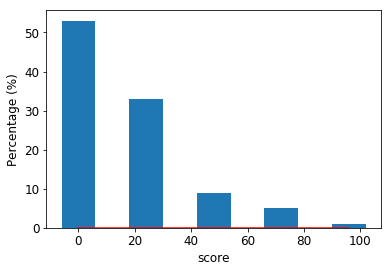

In [5]:
rupPred = RupturaPrediction(X)
rupPred.addFirstPrediction(Y)
rupPred.validate(Ytest, model)
dataScore = rupPred.calculateDataScore()  # passo que define a validacao
rupPred.plotScore(dataScore)

In [6]:
dataScore.to_csv('score-rupt.csv',sep=';')

In [8]:
rupPred = RupturaPrediction(X)
rupPred.addFirstPrediction(Y)
rupPred.validate(Ytest, model)

In [9]:
rupPred.plotAllBatches()